In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkey-syria-earthquake/Turkey_Syria_Earthquake Tweets.csv


In [2]:
csv_file_path = '/kaggle/input/turkey-syria-earthquake/Turkey_Syria_Earthquake Tweets.csv'
earthquake_tweets = pd.read_csv(csv_file_path, low_memory=False)

In [3]:
earthquake_tweets.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,NaN,NaN,Twitter Media Studio
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप ...,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,NaN,NaN,Twitter for Android


In [4]:
print("Dataset shape: ", earthquake_tweets.shape)
print("\nData types:\n", earthquake_tweets.dtypes)

Dataset shape:  (478052, 11)

Data types:
 date                object
content             object
hashtags            object
like_count         float64
rt_count           float64
followers_count    float64
isVerified          object
language            object
coordinates         object
place               object
source              object
dtype: object


In [5]:
print('There are {} rows and {} columns in train'.format(earthquake_tweets.shape[0],earthquake_tweets.shape[1]))
print('There are {} rows and {} columns in train'.format(earthquake_tweets.shape[0],earthquake_tweets.shape[1]))

There are 478052 rows and 11 columns in train
There are 478052 rows and 11 columns in train


# **On 6 February 2023, at 04:17 TRT (01:17 UTC)**, 
The devastating 7.8 earthquake struck southern and central Turkey and northern and western Syria
https://en.wikipedia.org/wiki/2023_Turkey%E2%80%93Syria_earthquake

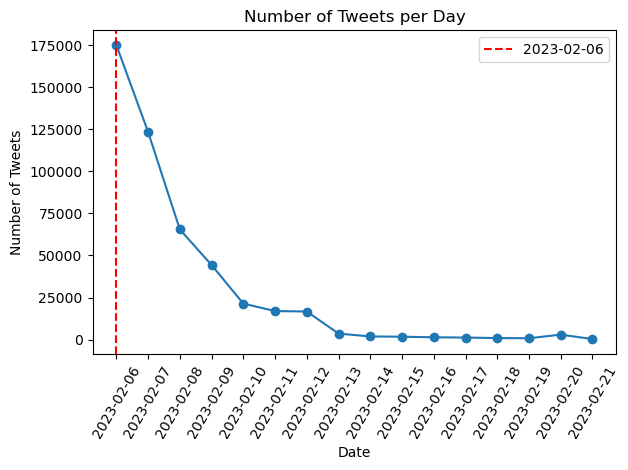

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
tweets_per_day = earthquake_tweets.resample('D', on='date').size()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2023-02-06')]  
date_range = pd.date_range(start='2023-02-07', end='2023-02-21', freq='D')
all_dates = specific_dates + date_range.tolist() 

ax.set_xticks(all_dates)

# Ensure that the specific date '2023-02-06' is displayed on the x-axis
ax.axvline(pd.Timestamp('2023-02-06'), color='red', linestyle='--', label='2023-02-06')
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=60)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


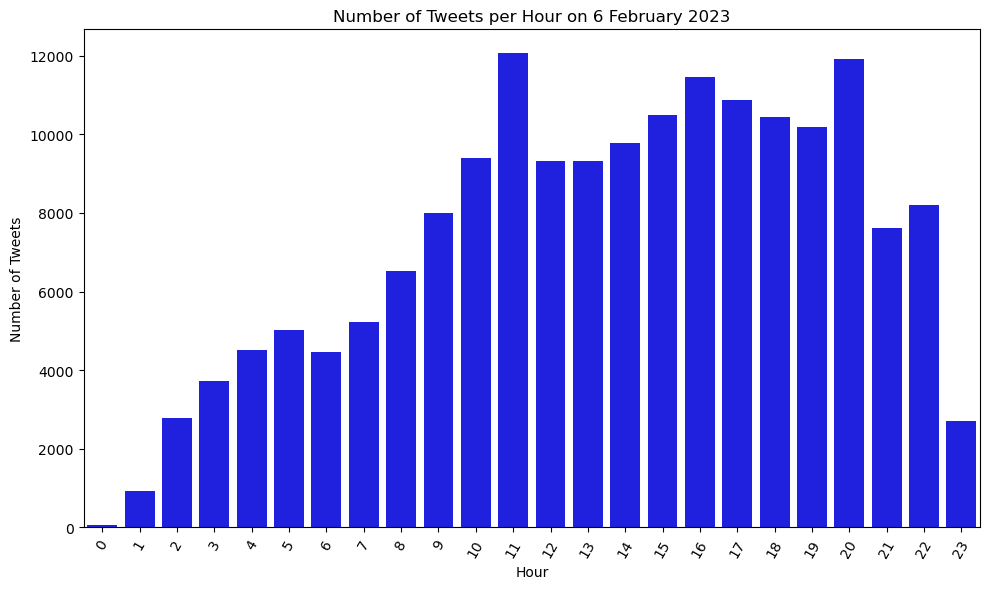

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame with the 'date' column
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])

# Filter the data for the date '2023-02-06'
tweets_on_6th_feb = earthquake_tweets[earthquake_tweets['date'].dt.date == pd.Timestamp('2023-02-06').date()].copy()

# Add a new column 'hour' to represent the hour of each tweet
tweets_on_6th_feb['hour'] = tweets_on_6th_feb['date'].dt.hour

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=tweets_on_6th_feb, x='hour', color='blue')  # Set a constant color
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Hour on 6 February 2023')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


# Analysing Likes, Retweets, Follower Count

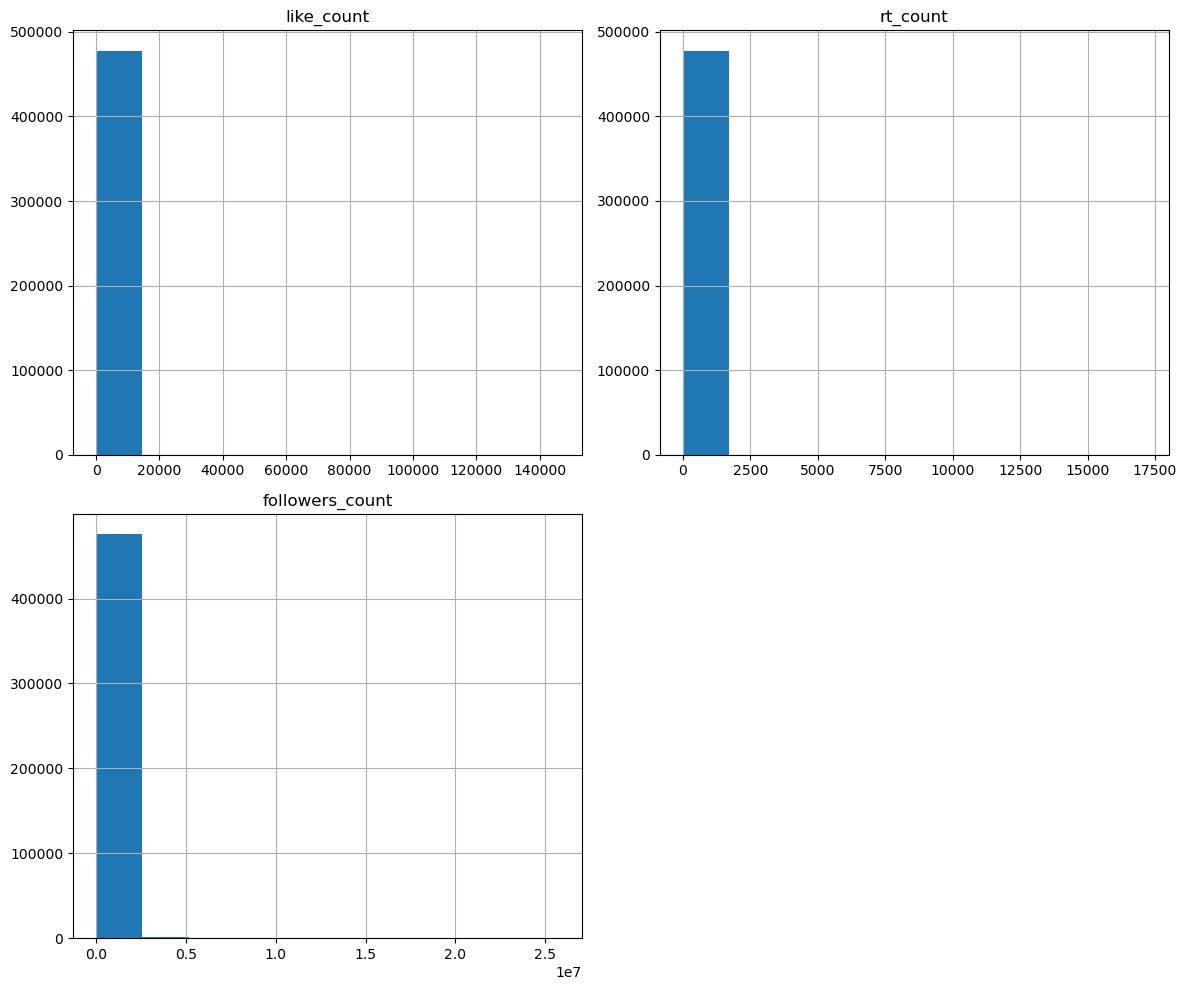

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming earthquake_tweets is your DataFrame

# Specify the columns you want to plot
columns_to_plot = ['like_count', 'rt_count', 'followers_count']

# Generate histograms for the specified columns
earthquake_tweets[columns_to_plot].hist(bins=10, figsize=(12, 10))

# Set plot labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Specific Columns')

plt.tight_layout()
plt.show()

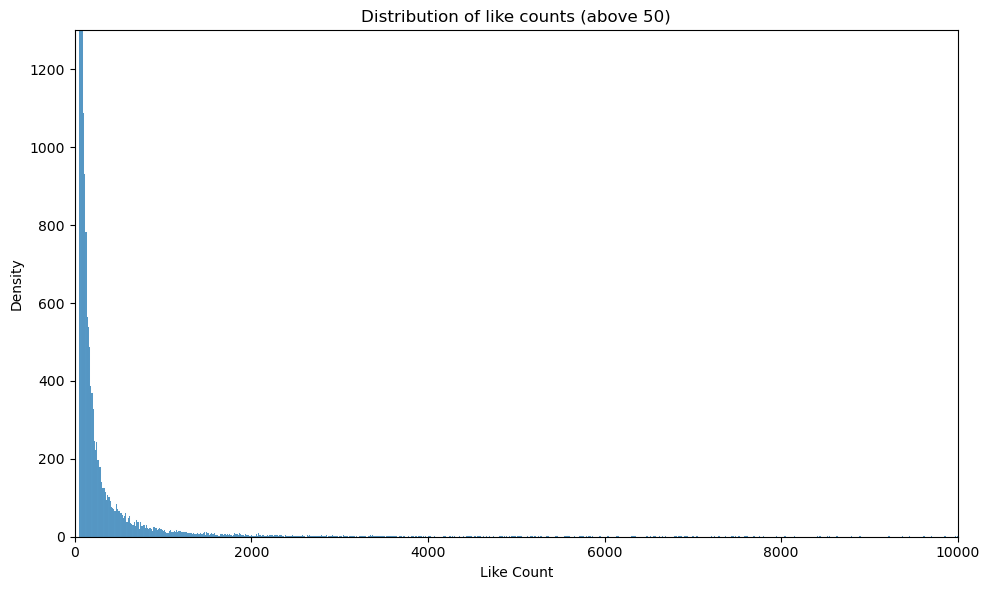

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame
earthquake_tweets['date'] = pd.to_datetime(earthquake_tweets['date'])

# Filter the data for like counts above 100
filtered_df = earthquake_tweets[earthquake_tweets['like_count'] > 50]

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x="like_count", kde=False)
plt.title("Distribution of like counts (above 50)")
plt.xlabel("Like Count")
plt.ylabel("Density")

# Limit the y-axis
plt.ylim(0, 1300)
plt.xlim(0, 10000)

plt.tight_layout()
plt.show()


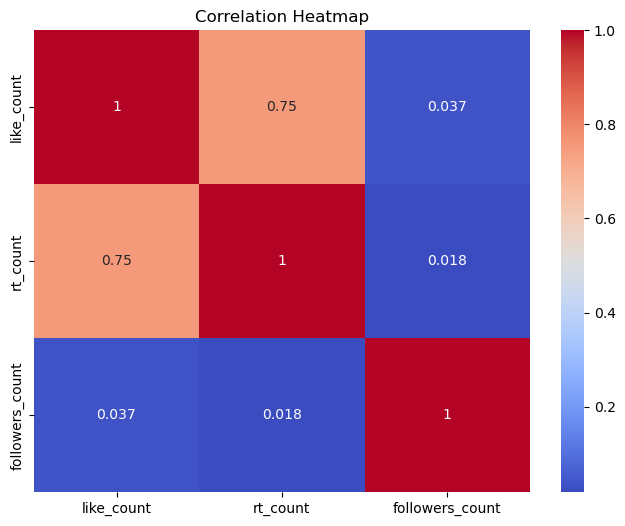

In [10]:
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame

# Select the columns you want to calculate correlations for
selected_columns = ['like_count', 'rt_count', 'followers_count']

# Create a subset DataFrame with selected columns
subset_df = earthquake_tweets[selected_columns]

# Calculate the correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


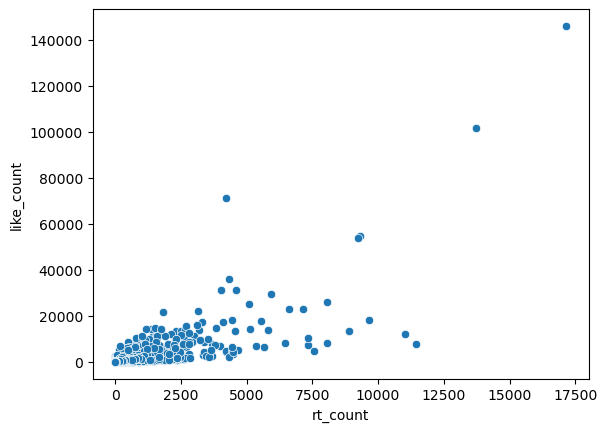

In [11]:
sns.scatterplot(x='rt_count', y='like_count', data=earthquake_tweets)
plt.show()

#  **HashTags**

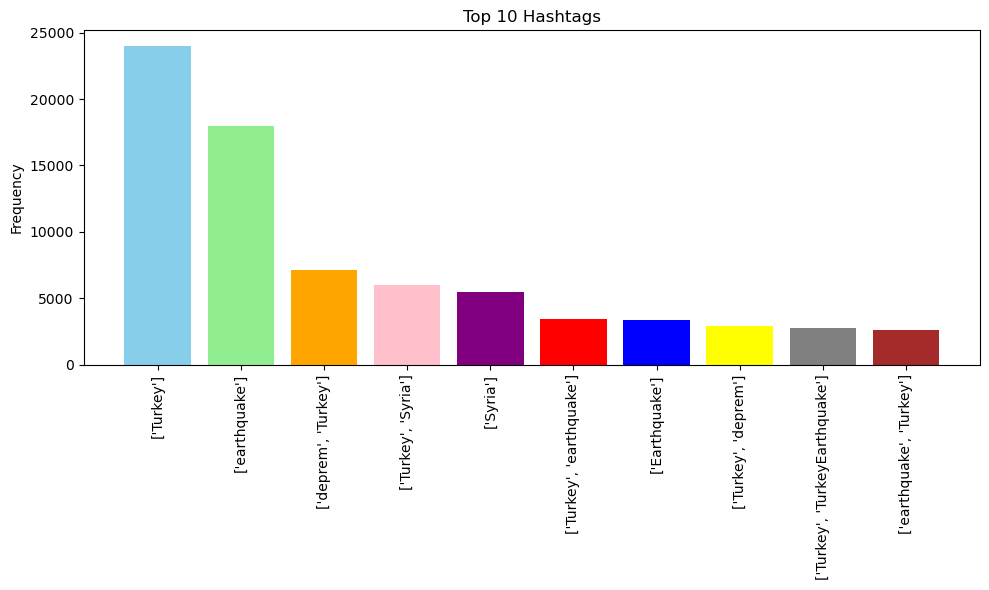

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming earthquake_tweets is your DataFrame

# Calculate the top hashtags
top_hashtags = earthquake_tweets['hashtags'].value_counts().nlargest(10)

# Define a list of colors
bar_colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple', 'red', 'blue', 'yellow', 'gray', 'brown']

# Create a bar plot using Matplotlib with custom colors for each bar
plt.figure(figsize=(10, 6))
for idx, (hashtag, count) in enumerate(top_hashtags.items()):
    plt.bar(hashtag, count, color=bar_colors[idx % len(bar_colors)])


plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Verified Tweets

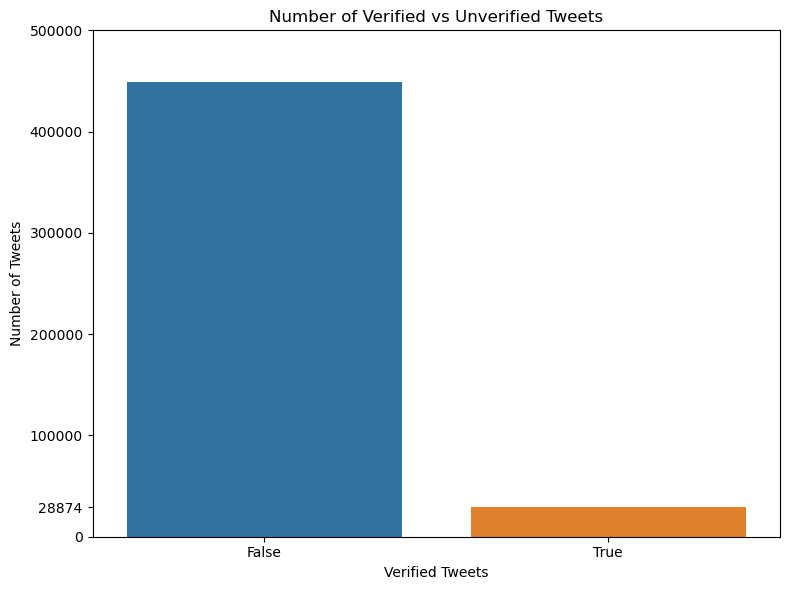

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming earthquake_tweets is your DataFrame

# Get the counts of verified and unverified tweets
verified_counts = earthquake_tweets['isVerified'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=verified_counts.index, y=verified_counts.values)
plt.title("Number of Verified vs Unverified Tweets")
plt.xlabel("Verified Tweets")
plt.ylabel("Number of Tweets")

extra_tick_value = verified_counts[True]
plt.yticks(list(plt.yticks()[0]) + [extra_tick_value])

plt.tight_layout()
plt.show()
